In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib

from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose,STL
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

In [3]:
car_data = pd.read_csv("data/vehicles.csv")
car_data

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
car_data1 = car_data.drop(labels='size', axis=1)

In [6]:
car_data2= car_data1.dropna()

In [7]:
car_data2.count()

id              61005
region          61005
price           61005
year            61005
manufacturer    61005
model           61005
condition       61005
cylinders       61005
fuel            61005
odometer        61005
title_status    61005
transmission    61005
VIN             61005
drive           61005
type            61005
paint_color     61005
state           61005
dtype: int64

In [8]:
car_data3=car_data2.drop(labels='VIN', axis=1)

C:\Users\nippa\AppData\Local\Temp\ipykernel_18136\3390245797.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_data3['price'])


Text(0.5, 1.0, 'Car Price Distribution Plot')

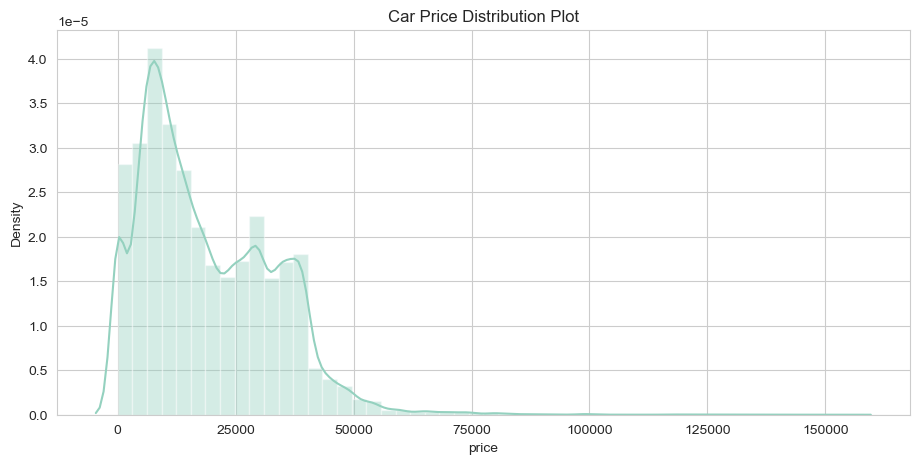

In [9]:
plt.figure(figsize=[11,5])
sns.distplot(car_data3['price'])
plt.title('Car Price Distribution Plot')

In [10]:
cols = ['year', 'odometer']
car_data3[cols] = car_data3[cols].applymap(np.int64)

In [11]:
car_data3['fuel'].unique()

array(['gas', 'other', 'hybrid', 'diesel', 'electric'], dtype=object)

In [12]:
car_data3['title_status'].unique()

array(['clean', 'rebuilt', 'salvage', 'lien', 'missing', 'parts only'],
      dtype=object)

In [13]:
car_data3['transmission'].unique()

array(['other', 'automatic', 'manual'], dtype=object)

In [14]:
car_data3['drive'].unique()

array(['4wd', 'rwd', 'fwd'], dtype=object)

In [15]:
car_data3['condition'].unique()

array(['good', 'like new', 'excellent', 'fair', 'new', 'salvage'],
      dtype=object)

In [16]:
car_data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61005 entries, 32 to 426878
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            61005 non-null  int64 
 1   region        61005 non-null  object
 2   price         61005 non-null  int64 
 3   year          61005 non-null  int64 
 4   manufacturer  61005 non-null  object
 5   model         61005 non-null  object
 6   condition     61005 non-null  object
 7   cylinders     61005 non-null  object
 8   fuel          61005 non-null  object
 9   odometer      61005 non-null  int64 
 10  title_status  61005 non-null  object
 11  transmission  61005 non-null  object
 12  drive         61005 non-null  object
 13  type          61005 non-null  object
 14  paint_color   61005 non-null  object
 15  state         61005 non-null  object
dtypes: int64(4), object(12)
memory usage: 7.9+ MB


In [17]:
list_of_input_features_for_outliers = ['odometer']

def findLimit(col):
    q1= car_data3[col].quantile(.25)
    q3=car_data3[col].quantile(.75)
    iqr= q3-q1
    lower= q1 - (1.5 *iqr)
    upper = q3 + (1.5 *iqr)
    return lower, upper

def outlier(col):
    lowLimit, upLimit = findLimit(col)
    print(col + str(lowLimit) + " to " + str(upLimit))
    car_data3[col] = np.where(car_data3[col]< lowLimit,lowLimit,car_data3[col])
    car_data3[col] = np.where(car_data3[col]> upLimit,upLimit,car_data3[col])
    
    
for col in list_of_input_features_for_outliers:
    outlier(col)


odometer-96400.5 to 263651.5


In [18]:
dummies = pd.get_dummies(car_data3.condition)
#print(dummies) 
# Concatenate the dummies to original dataframe
car_data3 = pd.concat([car_data3, dummies], axis='columns')
#print(mergedDF)
car_data3=car_data3.drop(['condition'], axis='columns')


In [19]:
dummies = pd.get_dummies(car_data3.title_status, prefix='title')
#print(dummies) 
# Concatenate the dummies to original dataframe
car_data3 = pd.concat([car_data3, dummies], axis='columns')
#print(mergedDF)
car_data3=car_data3.drop(['title_status'], axis='columns')

In [20]:
dummies = pd.get_dummies(car_data3.cylinders)
#print(dummies) 
# Concatenate the dummies to original dataframe
car_data3 = pd.concat([car_data3, dummies], axis='columns')
#print(mergedDF)
car_data3=car_data3.drop(['cylinders'], axis='columns')

In [21]:
car_data3.replace({False: 0, True: 1}, inplace=True)

In [22]:
car_data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61005 entries, 32 to 426878
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                61005 non-null  int64  
 1   region            61005 non-null  object 
 2   price             61005 non-null  int64  
 3   year              61005 non-null  int64  
 4   manufacturer      61005 non-null  object 
 5   model             61005 non-null  object 
 6   fuel              61005 non-null  object 
 7   odometer          61005 non-null  float64
 8   transmission      61005 non-null  object 
 9   drive             61005 non-null  object 
 10  type              61005 non-null  object 
 11  paint_color       61005 non-null  object 
 12  state             61005 non-null  object 
 13  excellent         61005 non-null  int64  
 14  fair              61005 non-null  int64  
 15  good              61005 non-null  int64  
 16  like new          61005 non-null  int64  
 

In [23]:
car_clean= car_data3.drop(['id', 'region','paint_color'], axis=1)

dummies = pd.get_dummies(car_clean.drive)
#print(dummies) 
# Concatenate the dummies to original dataframe
car_clean = pd.concat([car_clean, dummies], axis='columns')
car_clean=car_clean.drop(['drive'], axis='columns')

In [24]:
car_clean.replace({False: 0, True: 1}, inplace=True)

In [25]:
car_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61005 entries, 32 to 426878
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             61005 non-null  int64  
 1   year              61005 non-null  int64  
 2   manufacturer      61005 non-null  object 
 3   model             61005 non-null  object 
 4   fuel              61005 non-null  object 
 5   odometer          61005 non-null  float64
 6   transmission      61005 non-null  object 
 7   type              61005 non-null  object 
 8   state             61005 non-null  object 
 9   excellent         61005 non-null  int64  
 10  fair              61005 non-null  int64  
 11  good              61005 non-null  int64  
 12  like new          61005 non-null  int64  
 13  new               61005 non-null  int64  
 14  salvage           61005 non-null  int64  
 15  title_clean       61005 non-null  int64  
 16  title_lien        61005 non-null  int64  
 

C:\Users\nippa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\nippa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


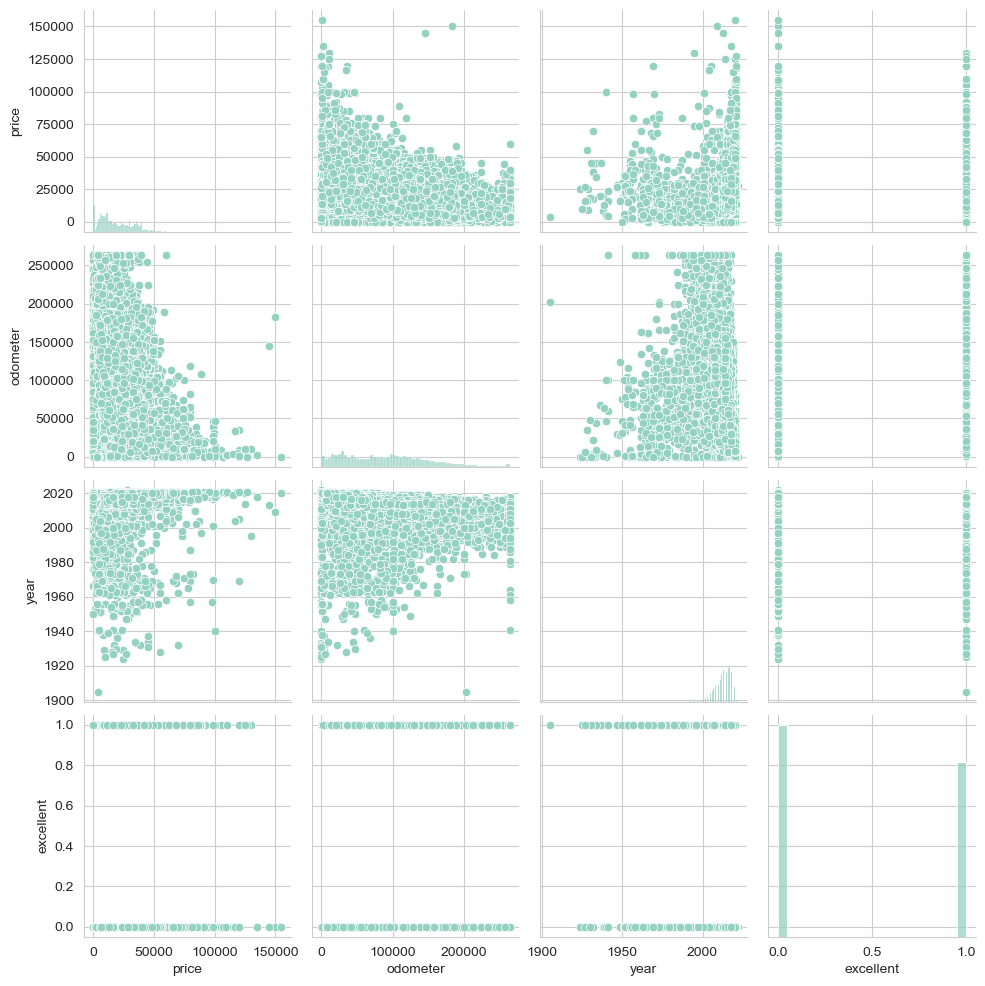

In [26]:
# Scatter plot for numerical features
num_features = ["price", "odometer", "year","excellent", "fair", "good","like new", "new", "salvage","title_clean", "title_lien", "title_missing","title_parts only","title_rebuilt","title_salvage","10 cylinders", "12 cylinders", "3 cylinders","4 cylinders", "5 cylinders", "6 cylinders", "8 cylinders","other","4wd","fwd","rwd" ]
num_features = ["price", "odometer", "year","excellent"]

sns.pairplot(car_clean[num_features], size = 2.5)
plt.show();

In [27]:
Car_cleanFinal= car_clean[car_clean["year"] > 1995]

In [28]:
Car_cleanFinal

,price,year,manufacturer,model,fuel,odometer,transmission,type,state,excellent,...,12 cylinders,3 cylinders,4 cylinders,5 cylinders,6 cylinders,8 cylinders,other,4wd,fwd,rwd
32,27990,2012,gmc,sierra 2500 hd extended cab,gas,68696.0,other,pickup,al,0,...,0,0,0,0,0,1,0,1,0,0
33,34590,2016,chevrolet,silverado 1500 double,gas,29499.0,other,pickup,al,0,...,0,0,0,0,1,0,0,1,0,0
35,29990,2016,chevrolet,colorado extended cab,gas,17302.0,other,pickup,al,0,...,0,0,0,0,1,0,0,1,0,0
36,38590,2011,chevrolet,corvette grand sport,gas,30237.0,other,other,al,0,...,0,0,0,0,0,1,0,0,0,1
38,32990,2017,jeep,wrangler unlimited sport,gas,30041.0,other,other,al,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,48590,2020,cadillac,xt6 premium luxury,gas,7701.0,other,other,wy,0,...,0,0,0,0,1,0,0,0,1,0
426860,39990,2017,infiniti,qx80 sport utility 4d,gas,41664.0,automatic,other,wy,0,...,0,0,0,0,0,1,0,1,0,0
426866,32990,2016,infiniti,qx80 sport utility 4d,gas,55612.0,automatic,other,wy,0,...,0,0,0,0,0,1,0,0,0,1
426874,33590,2018,lexus,gs 350 sedan 4d,gas,30814.0,automatic,sedan,wy,0,...,0,0,0,0,1,0,0,0,0,1


In [29]:
from sklearn.preprocessing import LabelEncoder
temp_data = Car_cleanFinal.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])
        
# Correated Features with target variable
print('\n--Correated Features with target variable--\n')
print(abs(temp_data.corrwith(temp_data['price'])).sort_values(ascending=False)[1:])



--Correated Features with target variable--

odometer            0.536699
year                0.512159
transmission        0.432649
fwd                 0.367554
4 cylinders         0.366783
8 cylinders         0.324667
excellent           0.267026
good                0.263256
4wd                 0.219122
rwd                 0.146280
fuel                0.127591
fair                0.095190
manufacturer        0.084687
5 cylinders         0.055411
6 cylinders         0.050443
type                0.043799
model               0.042443
title_clean         0.041938
title_salvage       0.038293
new                 0.035156
title_rebuilt       0.033976
like new            0.032729
10 cylinders        0.026675
salvage             0.023629
3 cylinders         0.021529
12 cylinders        0.021183
state               0.019989
title_lien          0.012660
title_missing       0.009195
title_parts only    0.005836
other               0.002164
dtype: float64


<Axes: >

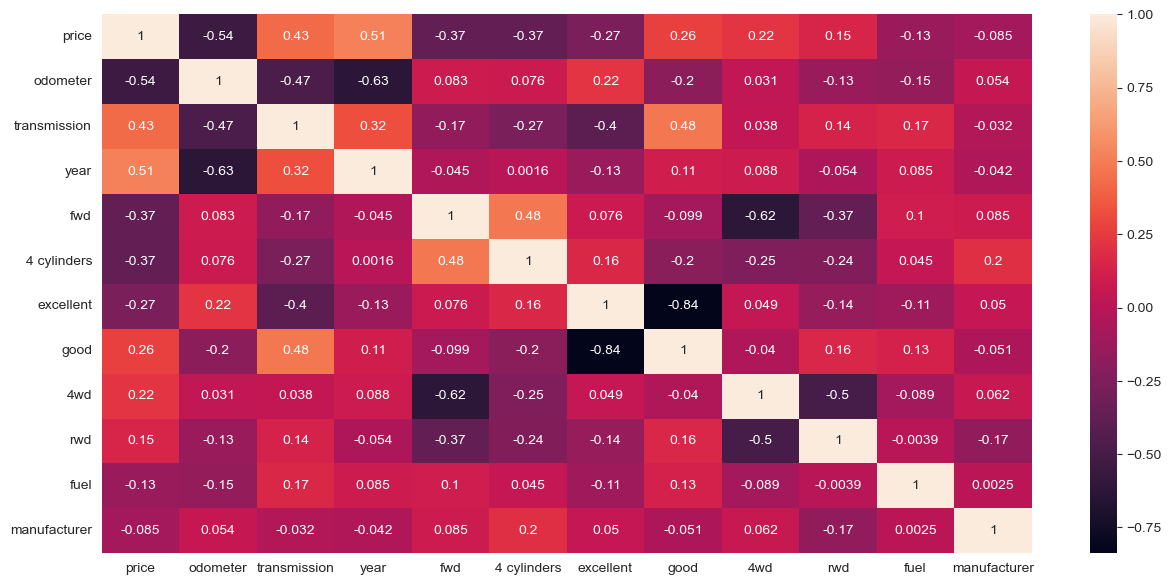

In [30]:
plt.figure(figsize=[15,7])
sns.heatmap(temp_data[['price','odometer','transmission','year','fwd','4 cylinders','excellent','good','4wd','rwd','fuel','manufacturer']].corr( ), annot=True)

In [31]:
Car_cleanFinal

,price,year,manufacturer,model,fuel,odometer,transmission,type,state,excellent,...,12 cylinders,3 cylinders,4 cylinders,5 cylinders,6 cylinders,8 cylinders,other,4wd,fwd,rwd
32,27990,2012,gmc,sierra 2500 hd extended cab,gas,68696.0,other,pickup,al,0,...,0,0,0,0,0,1,0,1,0,0
33,34590,2016,chevrolet,silverado 1500 double,gas,29499.0,other,pickup,al,0,...,0,0,0,0,1,0,0,1,0,0
35,29990,2016,chevrolet,colorado extended cab,gas,17302.0,other,pickup,al,0,...,0,0,0,0,1,0,0,1,0,0
36,38590,2011,chevrolet,corvette grand sport,gas,30237.0,other,other,al,0,...,0,0,0,0,0,1,0,0,0,1
38,32990,2017,jeep,wrangler unlimited sport,gas,30041.0,other,other,al,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,48590,2020,cadillac,xt6 premium luxury,gas,7701.0,other,other,wy,0,...,0,0,0,0,1,0,0,0,1,0
426860,39990,2017,infiniti,qx80 sport utility 4d,gas,41664.0,automatic,other,wy,0,...,0,0,0,0,0,1,0,1,0,0
426866,32990,2016,infiniti,qx80 sport utility 4d,gas,55612.0,automatic,other,wy,0,...,0,0,0,0,0,1,0,0,0,1
426874,33590,2018,lexus,gs 350 sedan 4d,gas,30814.0,automatic,sedan,wy,0,...,0,0,0,0,1,0,0,0,0,1


In [35]:
y=temp_data['price']

In [36]:
Xfinal= temp_data.drop(['price'], axis='columns')
X_train, X_test, y_train, y_test = train_test_split(Xfinal, y, random_state = 42)

In [37]:
print(Xfinal.shape,y.shape)

(60043, 31) (60043,)


In [38]:
from sklearn.metrics import mean_squared_error
from sklearn import set_config
from sklearn.pipeline import Pipeline
set_config(display="diagram")

# Perform Ridge Regression

ridge_param_dict = {'ridge__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]}
ridge_pipe = Pipeline([('scaler', StandardScaler()), 
                      ('ridge', Ridge())])
ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict)
ridge_grid.fit(X_train, y_train)
ridge_train_preds = ridge_grid.predict(X_train)
ridge_test_preds = ridge_grid.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)
### END SOLUTION

# ANSWER CHECK
print(f'Train MSE: {ridge_train_mse}')
print(f'Test MSE: {ridge_test_mse}')
ridge_pipe

Train MSE: 83042242.70626855
Test MSE: 84530520.81840588


Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])

In [39]:
r2_score(y_train, ridge_train_preds)

0.574877082201667

Feature: 0, Score: 35570210.55732
Feature: 1, Score: 524649.72350
Feature: 2, Score: 74363.49504
Feature: 3, Score: 13357237.49633
Feature: 4, Score: 31783242.46406
Feature: 5, Score: 4861679.10780
Feature: 6, Score: 540.09345
Feature: 7, Score: 911.76247
Feature: 8, Score: 1047372.50183
Feature: 9, Score: 35347.62075
Feature: 10, Score: 720734.44533
Feature: 11, Score: 131445.08996
Feature: 12, Score: 35515.28562
Feature: 13, Score: 29257.22082
Feature: 14, Score: 57676.29109
Feature: 15, Score: 69254.08060
Feature: 16, Score: 1050.11397
Feature: 17, Score: 424.43291
Feature: 18, Score: 62852.72820
Feature: 19, Score: 68991.94392
Feature: 20, Score: 333604.91120
Feature: 21, Score: 202977.94833
Feature: 22, Score: 351503.66985
Feature: 23, Score: 10673577.89983
Feature: 24, Score: 140454.51511
Feature: 25, Score: 19.74492
Feature: 26, Score: 12099491.39150
Feature: 27, Score: 120679.44102
Feature: 28, Score: 1677941.81439
Feature: 29, Score: 2762129.60139
Feature: 30, Score: 90808.147

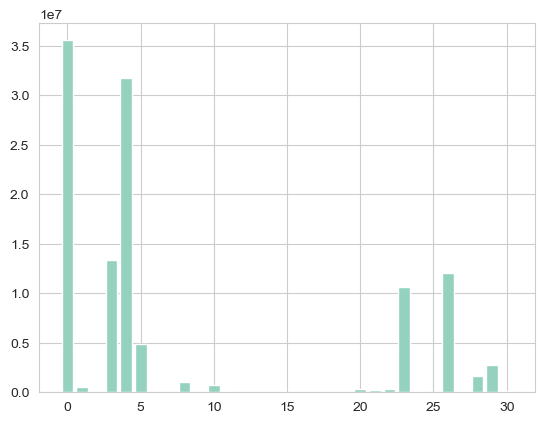

In [40]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from matplotlib import pyplot

results = permutation_importance(ridge_grid, X_train, y_train, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

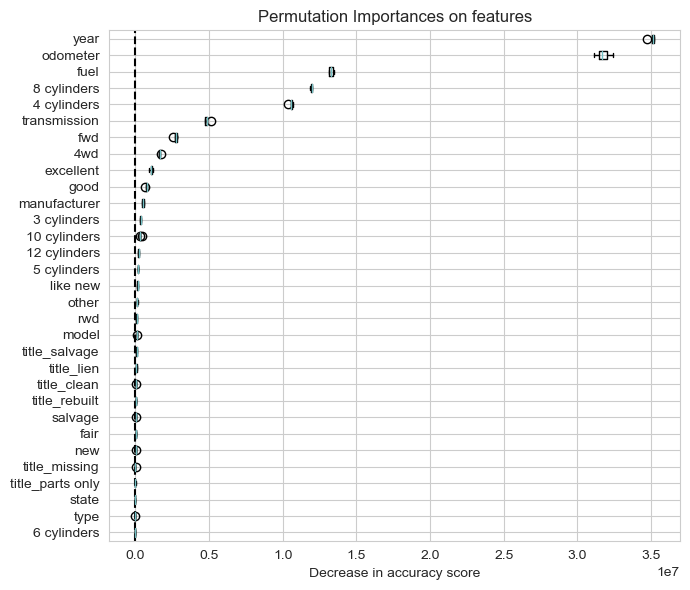

In [41]:
def plot_permutation_importance(clf, X, y, ax):
    results = permutation_importance(clf, X, y, scoring='neg_mean_squared_error')
    perm_sorted_idx = results.importances_mean.argsort()

    ax.boxplot(
        results.importances[perm_sorted_idx].T,
        vert=False,
        labels=X.columns[perm_sorted_idx],
    )
    ax.axvline(x=0, color="k", linestyle="--")
    return ax
fig, ax = plt.subplots(figsize=(7, 6))
plot_permutation_importance(ridge_grid, X_train, y_train, ax)
ax.set_title("Permutation Importances on features")
ax.set_xlabel("Decrease in accuracy score")
_ = ax.figure.tight_layout()

In [42]:
for i in results.importances_mean.argsort()[::-1]:
...     if results.importances_mean[i] - 2 * results.importances_std[i] > 0:
...         print(f"{Xfinal.columns[i]:<11}"
...               f"   {results.importances_mean[i]:.3f}"
...               f" +/- {results.importances_std[i]:.3f}")

year          35570210.557 +/- 559764.944
odometer      31783242.464 +/- 119588.253
fuel          13357237.496 +/- 46126.700
8 cylinders   12099491.391 +/- 124059.395
4 cylinders   10673577.900 +/- 161814.319
transmission   4861679.108 +/- 84817.764
fwd           2762129.601 +/- 56885.536
4wd           1677941.814 +/- 81903.131
excellent     1047372.502 +/- 70183.057
good          720734.445 +/- 50052.021
manufacturer   524649.724 +/- 55199.648
3 cylinders   351503.670 +/- 35832.664
10 cylinders   333604.911 +/- 27761.133
12 cylinders   202977.948 +/- 28498.606
5 cylinders   140454.515 +/- 18224.927
like new      131445.090 +/- 11113.175
other         120679.441 +/- 22104.981
rwd           90808.147 +/- 19692.904
model         74363.495 +/- 14992.495
title_lien    69254.081 +/- 29207.990
title_salvage   68991.944 +/- 17278.424
title_rebuilt   62852.728 +/- 9803.319
title_clean   57676.291 +/- 17827.704
new           35515.286 +/- 10547.254
fair          35347.621 +/- 7140.645
salvage  

In [43]:
### Now Linear regression
from sklearn.linear_model import LinearRegression
model_list = []

model =LinearRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

model_test_mse = mean_squared_error(y_test, y_test_pred)
model_train_mse = mean_squared_error(y_train, y_train_pred)
model_list.append({'LinearRegression deg 3 =':model_test_mse})
print("Train MSE : " + str(model_train_mse))
print("Test MSE : " + str(model_test_mse))

Train MSE : 83042030.21389076
Test MSE : 84531513.72429265


In [44]:
r2_score(y_test, y_test_pred)

0.5687689114602137

In [45]:
r2_score(y_train, y_train_pred)

0.5748781700260888

In [47]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.pipeline import make_pipeline

lin = make_pipeline(
    StandardScaler(), # scale as the values range widely after adding polynomial features
    LinearRegression()
)
# Initialize cross validator
cv = KFold(n_splits = 5, shuffle = True, random_state = 2023)

# Cross validate (cross_val_score computes NEGATIVE mean squared error neg_root_mean_squared_error)
results = cross_validate(lin, Xfinal, y, scoring = 'neg_mean_squared_error', cv = cv, return_estimator = True)  # to return the coefficients
results = pd.DataFrame(results)
print(results)

# Extract & find the mean RMSE
full_rmse = - round(results['test_score'],3)
print("Mean MSE:", round(full_rmse.mean(),3))

   fit_time  score_time                               estimator    test_score
0  0.075291    0.007675  (StandardScaler(), LinearRegression()) -8.543338e+07
1  0.067437    0.005002  (StandardScaler(), LinearRegression()) -8.193412e+07
2  0.062732    0.006001  (StandardScaler(), LinearRegression()) -8.681622e+07
3  0.070004    0.005509  (StandardScaler(), LinearRegression()) -8.345268e+07
4  0.069137    0.005002  (StandardScaler(), LinearRegression()) -7.985561e+07
Mean MSE: 83498402.967
